<a href="https://colab.research.google.com/github/hassanimran02/Expenses-Forecasting/blob/main/Data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [171]:
from pandas.core import resample as rp

In [172]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [173]:
expense_df = pd.read_csv("./Dataset/expense_data_1.csv")

In [174]:
expense_df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [175]:
expense_df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [176]:
expense_df.dtypes

Date               object
Account            object
Category           object
Subcategory       float64
Note               object
INR               float64
Income/Expense     object
Note.1            float64
Amount            float64
Currency           object
Account.1         float64
dtype: object

In [177]:
expense_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [178]:
missing_values=expense_df.columns[expense_df.isna().any()] ## checking the columns for which have NaN values

In [179]:
missing_values

Index(['Subcategory', 'Note', 'Note.1'], dtype='object')

In [180]:
expense_df=expense_df.drop(['Subcategory','Note.1','Account.1','Currency','INR'],axis=1)
##Dropping these columns due to NAN values, and similar typeof data in 1 or more columns

In [181]:
expense_df

,Date,Account,Category,Note,Income/Expense,Amount
0,3/2/2022 10:11,CUB - online payment,Food,Brownie,Expense,50.0
1,3/2/2022 10:11,CUB - online payment,Other,To lended people,Expense,300.0
2,3/1/2022 19:50,CUB - online payment,Food,Dinner,Expense,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,Metro,Expense,30.0
4,3/1/2022 18:22,CUB - online payment,Food,Snacks,Expense,67.0
...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,Dinner,Expense,90.0
273,11/22/2021 14:16,CUB - online payment,Food,Lunch with company,Expense,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,Rapido,Expense,130.0
275,11/21/2021 15:50,CUB - online payment,Food,Lunch,Expense,875.0


In [182]:
expense_df=expense_df.dropna()##Drop NaN values rowwise

In [183]:
expense_df.isna().sum()## No NaN or missing value in dataset

Date              0
Account           0
Category          0
Note              0
Income/Expense    0
Amount            0
dtype: int64

In [184]:
expense_df.dtypes

Date               object
Account            object
Category           object
Note               object
Income/Expense     object
Amount            float64
dtype: object

In [185]:
expense_df['Date']=pd.to_datetime(expense_df.Date) ##Converting DateTime column into Date and Time seperately
expense_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23428\504097756.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date,Account,Category,Note,Income/Expense,Amount
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,Expense,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,Expense,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,Expense,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,Expense,67.0
...,...,...,...,...,...,...
272,2021-11-22 14:16:00,CUB - online payment,Food,Dinner,Expense,90.0
273,2021-11-22 14:16:00,CUB - online payment,Food,Lunch with company,Expense,97.0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,Rapido,Expense,130.0
275,2021-11-21 15:50:00,CUB - online payment,Food,Lunch,Expense,875.0


In [186]:
expense_df.dtypes

Date              datetime64[ns]
Account                   object
Category                  object
Note                      object
Income/Expense            object
Amount                   float64
dtype: object

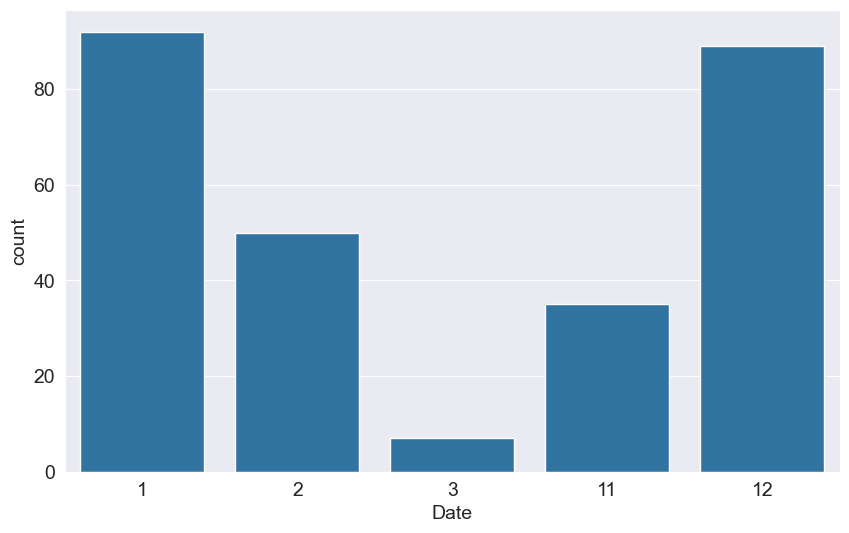

In [187]:
sns.countplot(x=pd.to_datetime(expense_df.Date).dt.month);

In [188]:
px.histogram(expense_df,'Income/Expense',title='Expenses vs Income')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Income/Expense=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['Expense', 'Expense', 'Expense', ..., 'Expense', 'Expense', 'Income'],
                         dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Expenses vs Income'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Income/Expense'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [189]:
len(expense_df) ##Total length of the dataset

273

In [190]:
income_df=expense_df[expense_df['Income/Expense']== 'Income'] # shifted the income from expense dataset

In [191]:
income_df

,Date,Account,Category,Note,Income/Expense,Amount
5,2022-03-01 18:22:00,CUB - online payment,Other,From vicky,Income,100.0
6,2022-03-01 18:21:00,CUB - online payment,Other,From dad,Income,500.0
8,2022-02-28 11:45:00,CUB - online payment,Other,From kumara,Income,200.0
11,2022-02-26 17:37:00,CUB - online payment,Other,From dad,Income,1500.0
45,2022-02-12 14:47:00,CUB - online payment,Other,From dad,Income,10000.0
48,2022-02-08 10:37:00,CUB - online payment,Other,From dad,Income,1000.0
54,2022-02-06 16:41:00,CUB - online payment,Other,Salary from dad,Income,5000.0
60,2022-02-02 20:14:00,CUB - online payment,Other,From dad,Income,500.0
75,2022-01-27 13:38:00,CUB - online payment,Other,From vicky,Income,300.0
76,2022-01-27 13:38:00,CUB - online payment,Other,From dad,Income,1500.0


In [192]:
len(income_df) # length of the new dataset

46

In [193]:
expense_df=expense_df.drop(expense_df.loc[expense_df['Income/Expense'].isin(['Income'])].index)
# dropping the orws which contains income

In [194]:
expense_df # new length of the dataset

,Date,Account,Category,Note,Income/Expense,Amount
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,Expense,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,Expense,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,Expense,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,Expense,67.0
...,...,...,...,...,...,...
271,2021-11-23 22:53:00,CUB - online payment,Food,Dinner,Expense,179.0
272,2021-11-22 14:16:00,CUB - online payment,Food,Dinner,Expense,90.0
273,2021-11-22 14:16:00,CUB - online payment,Food,Lunch with company,Expense,97.0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,Rapido,Expense,130.0


In [195]:
px.histogram(expense_df,'Category',title='Frequently bought')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Category=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['Food', 'Other', 'Food', ..., 'Food', 'Transportation', 'Food'],
                         dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Frequently bought'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Category'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [196]:
expense_amount=expense_df.Amount.sum() # Total amount of expense
expense_amount

55857.28

In [197]:
income_amount=income_df.Amount.sum() # Total amount of income
income_amount

54754.0

In [198]:
expense_amount-income_amount

1103.2799999999988

In [199]:
expense_df['Date'] = pd.to_datetime(expense_df['Date'], format='%d-%M-%Y')

In [200]:
expense_df.Date

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
271   2021-11-23 22:53:00
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
Name: Date, Length: 227, dtype: datetime64[ns]

<Axes: xlabel='Date'>

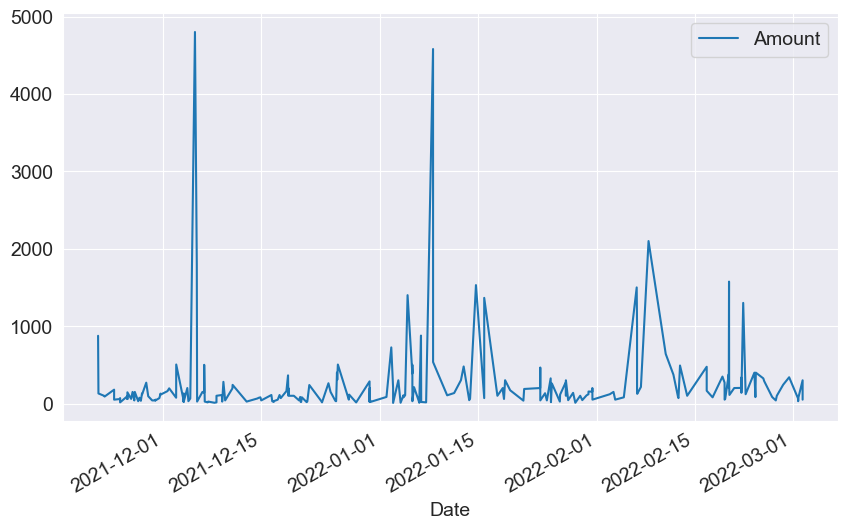

In [201]:
# Monthly spending

# Plotting monthly_spending
expense_df.plot(x='Date',y='Amount')

In [202]:
date=expense_df['Date'].dt.month

In [203]:
expense_df.set_index('Date').groupby(rp.TimeGrouper(freq='M')) ##Convrting object date into month wise

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23428\2053761321.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [204]:
expense_df

,Date,Account,Category,Note,Income/Expense,Amount
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,Expense,50.0
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,Expense,300.0
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,Expense,78.0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,Expense,67.0
...,...,...,...,...,...,...
271,2021-11-23 22:53:00,CUB - online payment,Food,Dinner,Expense,179.0
272,2021-11-22 14:16:00,CUB - online payment,Food,Dinner,Expense,90.0
273,2021-11-22 14:16:00,CUB - online payment,Food,Lunch with company,Expense,97.0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,Rapido,Expense,130.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23428\2786824107.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23428\2786824107.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



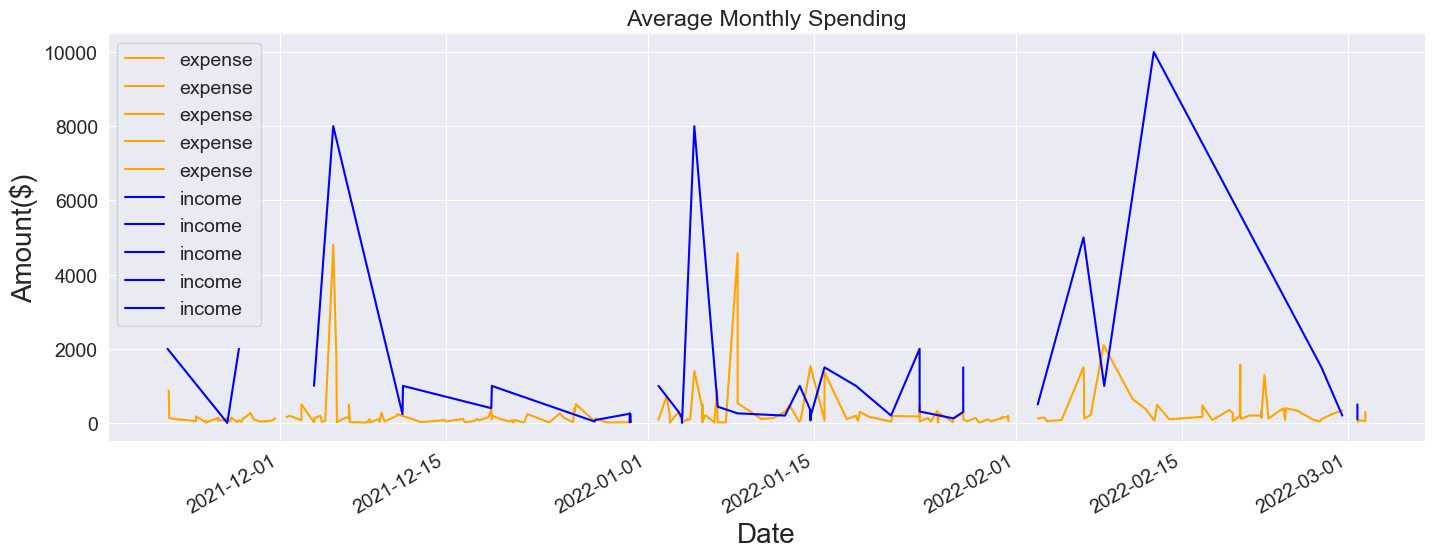

In [205]:
# Monthly spending
monthly_spending = expense_df.set_index('Date').groupby(rp.TimeGrouper(freq='M')).Amount
monthly_income = income_df.set_index('Date').groupby(rp.TimeGrouper(freq='M')).Amount


# Plotting monthly_spending

plt.title('Average Monthly Spending')
monthly_spending.plot(figsize=(17,6),label='expense', color='orange')
monthly_income.plot(figsize=(17,6),label='income', color='blue')
plt.legend()
plt.xlabel('Date', size=20)
plt.ylabel('Amount($)', size=20)
plt.show()

In [206]:
monthly_spending = expense_df.set_index('Date').groupby(rp.TimeGrouper(freq='M')).Amount
monthly_income = income_df.set_index('Date').groupby(rp.TimeGrouper(freq='M')).Amount

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23428\3964826468.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23428\3964826468.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



### Training on the dataset

## Linear Regression using a Single Feature

In [207]:
! pip install scikit-learn --quiet

In [208]:
from sklearn.linear_model import LinearRegression

In [209]:
model = LinearRegression()

In [210]:
category_code={'Food':0, 'Other':1, 'Transportation':2, 'Apparel':3, 'Household':4,
       'Social Life':5, 'Education':6, 'Self-development':7, 'Beauty':8, 'Gift':9
}

In [211]:
expense_df['category_code']=expense_df.Category.map(category_code)

In [212]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [213]:
# Create inputs and targets
inputs, targets = expense_df[['category_code']], expense_df['Amount']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 492.61941387342733


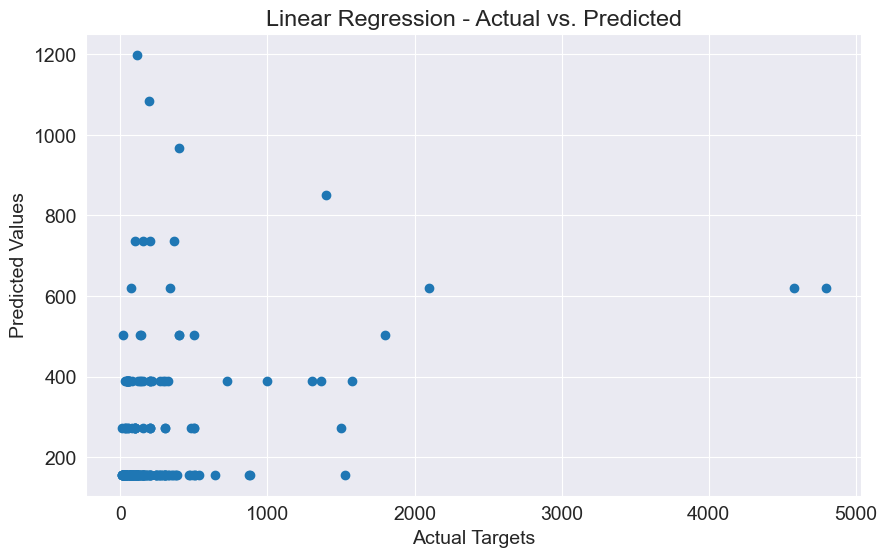

In [214]:
Plots a scatter plot of the actual targets and the predicted values from a linear regression model.
plt.scatter(targets, predictions)
plt.xlabel('Actual Targets')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Actual vs. Predicted')
plt.show()

## Support Vector Regression

In [215]:
expense_df

,Date,Account,Category,Note,Income/Expense,Amount,category_code
0,2022-03-02 10:11:00,CUB - online payment,Food,Brownie,Expense,50.0,0
1,2022-03-02 10:11:00,CUB - online payment,Other,To lended people,Expense,300.0,1
2,2022-03-01 19:50:00,CUB - online payment,Food,Dinner,Expense,78.0,0
3,2022-03-01 18:56:00,CUB - online payment,Transportation,Metro,Expense,30.0,2
4,2022-03-01 18:22:00,CUB - online payment,Food,Snacks,Expense,67.0,0
...,...,...,...,...,...,...,...
271,2021-11-23 22:53:00,CUB - online payment,Food,Dinner,Expense,179.0,0
272,2021-11-22 14:16:00,CUB - online payment,Food,Dinner,Expense,90.0,0
273,2021-11-22 14:16:00,CUB - online payment,Food,Lunch with company,Expense,97.0,0
274,2021-11-21 17:07:00,CUB - online payment,Transportation,Rapido,Expense,130.0,2


In [216]:
"""
Extracts the first column of the `expense_df` DataFrame as a NumPy array.

This code selects the first column (index 0) of the `expense_df` DataFrame and converts it to a NumPy array. The resulting array `X` can be used for further data processing or analysis.
"""
X = expense_df.iloc[:, 0:1].values

In [217]:
"""
Extracts the values from the 5th column of the `expense_df` DataFrame and reshapes the resulting 1D array into a 2D array with 1 row.

Args:
    expense_df (pandas.DataFrame): The DataFrame containing the expense data.

Returns:
    numpy.ndarray: A 2D array with the values from the 5th column of `expense_df`.
"""
y = expense_df.iloc[:, 5].values
y2= y.reshape(1,-1)

In [218]:
print(y2)

[[  50.    300.     78.     30.     67.    339.15  243.    100.     40.
    84.    289.    324.7   399.     83.    399.    120.   1300.    138.
   336.    201.8   200.    111.    250.   1575.    200.    380.     60.
    50.    270.    348.     80.    165.    475.    100.    491.     70.
    80.    373.    641.   2099.    214.    125.    150.   1000.   1500.
    80.     50.    150.    120.     50.    200.    153.    155.    120.
   105.     44.    100.     10.    138.     43.    300.    100.    279.
   115.     25.    259.     18.    325.     40.    133.     40.    465.
   300.    302.    176.    200.    188.     37.    171.    301.15   59.
   148.    200.    100.   1365.     70.   1530.     66.     43.    479.
   301.75  135.5   106.    535.3  4580.     15.     20.    877.81   10.
    42.    211.     40.     30.    354.    500.    500.     60.    388.
  1400.    106.     80.    107.     10.    300.      8.    200.    725.
    85.     20.     43.     25.    199.     20.    286.     14. 

In [219]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y2)

In [220]:
X.shape, y.shape

((227, 1), (1, 227))

In [221]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
y=y.flatten() ## used tp convert 2D array into 1D array
regressor.fit(X, y)

SVR()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23428\4126794818.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



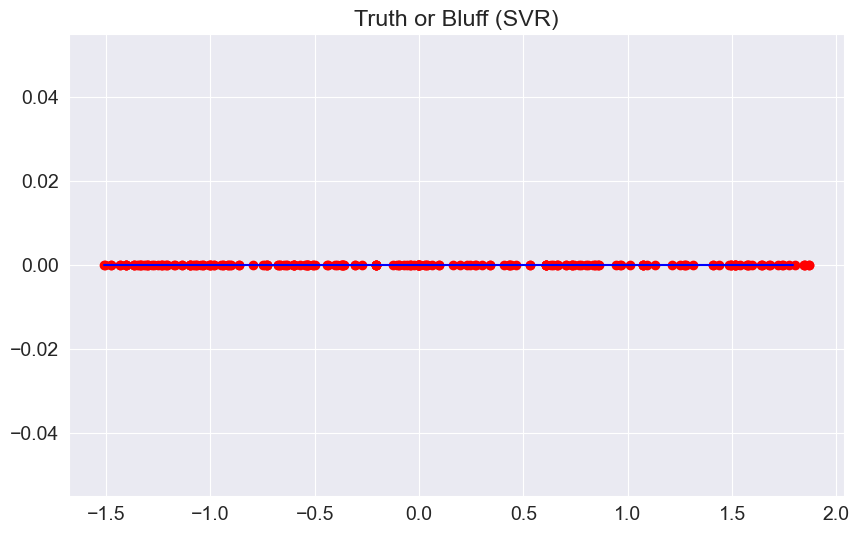

In [222]:
X_grid = np.arange(min(X), max(X), 0.1) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.show()

## Time Series Analysis

In [223]:
expense_df.Date

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
271   2021-11-23 22:53:00
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
Name: Date, Length: 227, dtype: datetime64[ns]

In [224]:
!pip install prophet

In [225]:
from prophet import Prophet

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [226]:
expense_df_TSA=expense_df

In [227]:
expense_df_TSA=expense_df_TSA.drop(['Account','Category','Note','Income/Expense','category_code'],axis=1)

In [228]:
expense_df_TSA.rename(columns={'Date':'ds','Amount':'y'},inplace=True)

In [229]:
expense_df_TSA

,ds,y
0,2022-03-02 10:11:00,50.0
1,2022-03-02 10:11:00,300.0
2,2022-03-01 19:50:00,78.0
3,2022-03-01 18:56:00,30.0
4,2022-03-01 18:22:00,67.0
...,...,...
271,2021-11-23 22:53:00,179.0
272,2021-11-22 14:16:00,90.0
273,2021-11-22 14:16:00,97.0
274,2021-11-21 17:07:00,130.0


In [230]:
p=Prophet(interval_width=0.92,daily_seasonality=True)
model= p.fit(expense_df_TSA)

16:36:53 - cmdstanpy - INFO - Chain [1] start processing
16:36:53 - cmdstanpy - INFO - Chain [1] done processing


In [231]:
future = model.make_future_dataframe(periods=36,freq='M')

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [233]:
forecast_prediction = model.predict(future)

In [234]:
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
240,2024-10-31 10:11:00,1119.769295,133.139370,1963.161539,1119.029414,1120.512687,-5.278816,-5.278816,-5.278816,144.960912,144.960912,144.960912,-150.239728,-150.239728,-150.239728,0.0,0.0,0.0,1114.490479
241,2024-11-30 10:11:00,1147.464659,480.320791,2283.462819,1146.680423,1148.236498,194.479422,194.479422,194.479422,144.960912,144.960912,144.960912,49.518510,49.518510,49.518510,0.0,0.0,0.0,1341.944081
242,2024-12-31 10:11:00,1176.083202,361.050741,2168.718852,1175.270707,1176.889620,80.416149,80.416149,80.416149,144.960912,144.960912,144.960912,-64.544762,-64.544762,-64.544762,0.0,0.0,0.0,1256.499352
243,2025-01-31 10:11:00,1204.701746,400.154851,2151.019543,1203.858372,1205.550860,105.411277,105.411277,105.411277,144.960912,144.960912,144.960912,-39.549635,-39.549635,-39.549635,0.0,0.0,0.0,1310.113023
244,2025-02-28 10:11:00,1230.550753,469.440925,2226.679949,1229.668853,1231.435053,105.411277,105.411277,105.411277,144.960912,144.960912,144.960912,-39.549635,-39.549635,-39.549635,0.0,0.0,0.0,1335.962030


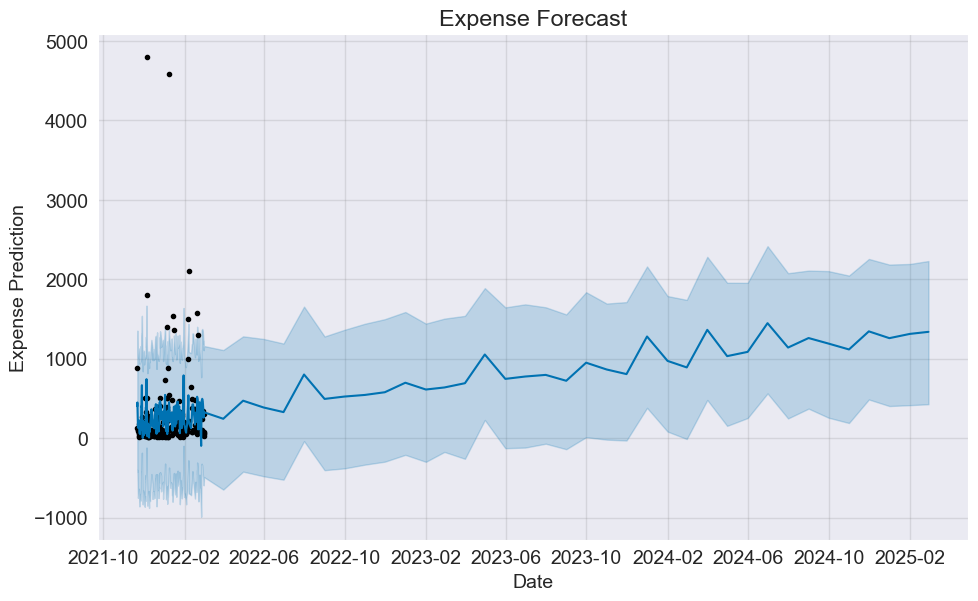

In [ ]:
p.plot(forecast_prediction)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Expense Prediction')
plt.title('Expense Forecast')



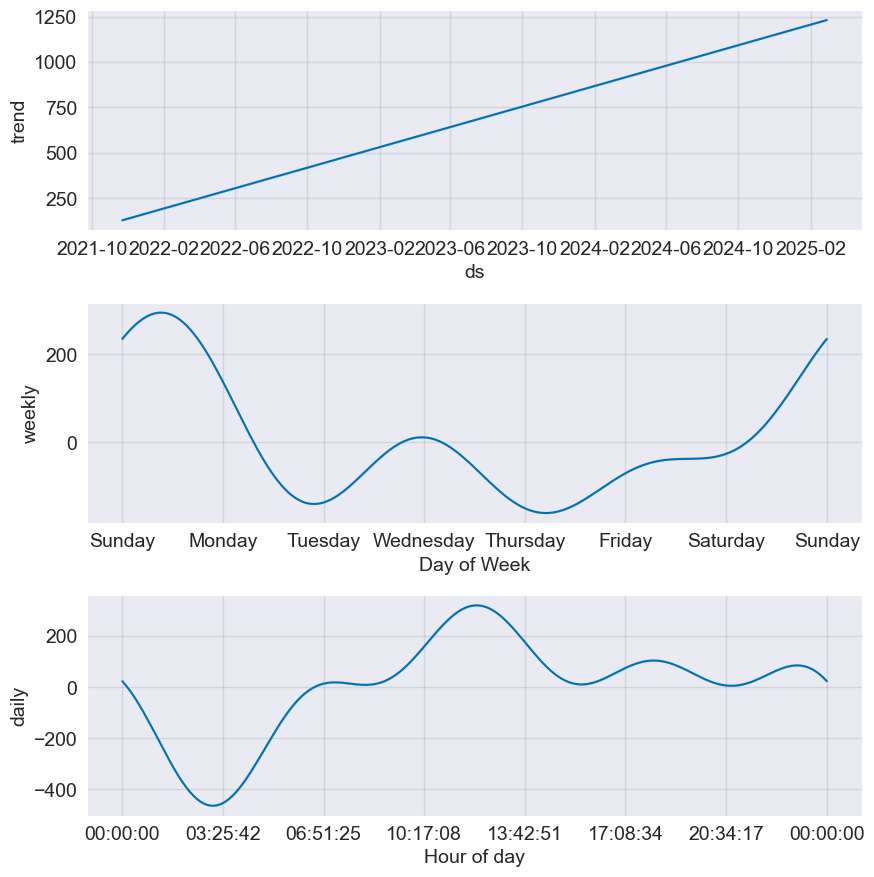

In [ ]:
fig = p.plot_components(forecast_prediction)
plt.show()


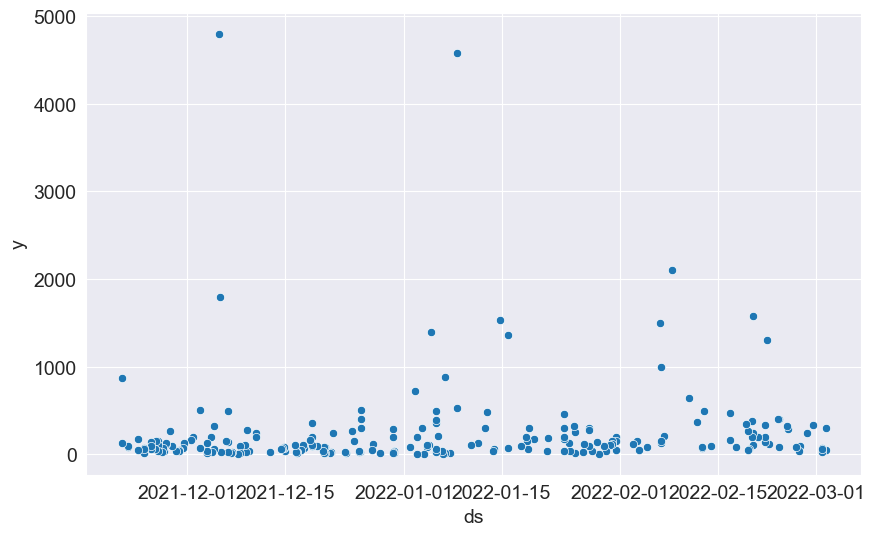

In [ ]:
sns.scatterplot(x='ds', y='y', data=expense_df_TSA)
plt.show()

In [ ]:
import pandas as pd

# Create some dummy data
data = expense_df['Amount']

# Create windows of size 4
windows = data.rolling(2)

# Apply a function to each window to get the inputs and outputs
# For example, use the mean as input and the last value as output
X = windows.mean().dropna()
y = windows.apply(lambda x: data[1]).dropna()

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y.values.reshape(-1, 1))

# Make predictions on new data
new_data = pd.Series([0,299])
new_window = new_data.rolling(2).mean().dropna()
prediction = model.predict(new_window.values.reshape(-1, 1))
print(prediction)


[[300.]]


## Decision Tree

In [ ]:
## features (X) and target (y)
X = expense_df[['category_code']]
y = expense_df['Amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 583.9891899790842


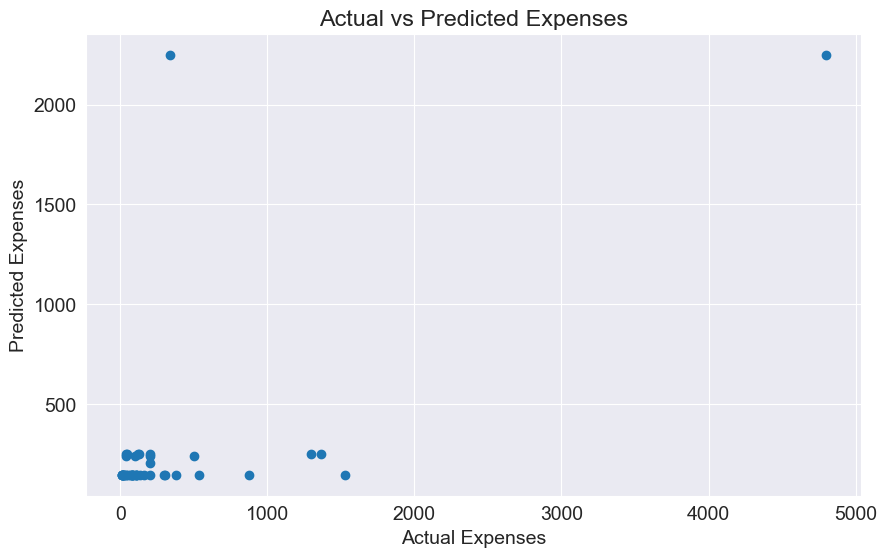

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Expenses')
plt.show()